In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
covid = pd.read_csv('us-counties-2020.csv')
covid[(covid['county'] == 'Unknown') & (covid['date'] == '2020-12-31')]
covid = covid[covid['county'] != 'Unknown']
covid['county_state'] = covid['county'] + ", " + covid['state']
covid
covid['county'].describe()
covid['state'].describe()


count     877254
unique        54
top        Texas
freq       67001
Name: state, dtype: object

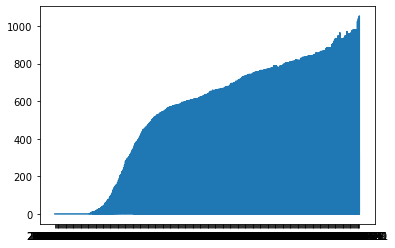

In [5]:
washington_data = covid[covid['state']=='Washington']
plt.plot(washington_data['date'],washington_data['deaths']);
def extract_time_range_data(start_date,end_date):
    diff_deaths = covid[covid['date'] == end_date].set_index('county_state')['deaths'] - covid[covid['date'] == start_date].set_index('county_state')['deaths']
    diff_cases = covid[covid['date'] == end_date].set_index('county_state')['cases'] - covid[covid['date'] == start_date].set_index('county_state')['cases']
    df = covid[covid['date'] == end_date].set_index('county_state')
    df['new_cases'] = diff_cases
    df['new_deaths'] = diff_deaths
    df.drop('cases',inplace=True,axis=1)
    df.drop('deaths',inplace=True,axis=1)
    df.drop('date',inplace=True,axis=1)
    return df


In [6]:
covid_tf = extract_time_range_data('2020-08-01','2020-12-31')
covid_tf = covid_tf.sort_values('new_cases')
covid_tf = covid_tf[~covid_tf['new_cases'].isna()]
covid_tf['mortality'] = covid_tf['new_deaths']/covid_tf['new_cases']
covid_tf.loc[covid_tf['new_cases']==0,'mortality'] = 0
covid_tf.loc[covid_tf['mortality']>=1,'mortality'] = 1
covid_tf


,county,state,fips,new_cases,new_deaths,mortality
county_state,,,,,,
"Tinian, Northern Mariana Islands",Tinian,Northern Mariana Islands,69120.0,1.0,0.0,0.000000
"Harding, New Mexico",Harding,New Mexico,35021.0,7.0,0.0,0.000000
"Hinsdale, Colorado",Hinsdale,Colorado,8053.0,10.0,0.0,0.000000
"Culebra, Puerto Rico",Culebra,Puerto Rico,72049.0,11.0,NaN,NaN
"Haines Borough, Alaska",Haines Borough,Alaska,2100.0,12.0,0.0,0.000000
...,...,...,...,...,...,...
"Miami-Dade, Florida",Miami-Dade,Florida,12086.0,177666.0,2541.0,0.014302
"New York City, New York",New York City,New York,NaN,200716.0,2137.0,0.010647
"Maricopa, Arizona",Maricopa,Arizona,4013.0,203154.0,3036.0,0.014944


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 280 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

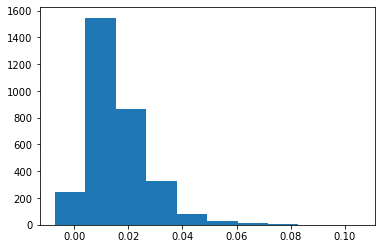

In [7]:
plt.hist(covid_tf['mortality'])
demo = pd.read_csv('New Project 2_Ranking_2022-10-27_17-24-28.csv')
demo.info(verbose=True)
demo_clean = demo.drop(demo.columns[[1,2,3,4,5,6,7,21,22]],axis=1)
# drop population-related data & Age over 65 and more & income over 100k
demo_clean.info(verbose=True)


In [8]:
demo_clean = demo_clean.drop(demo_clean.columns[[24,37]],axis=1)
demo_clean.info(verbose=True)
demo_clean.iloc[:,24]
demo_clean.iloc[:,2:23] = demo_clean.iloc[:,2:23].div(demo_clean.iloc[:,1],axis=0)
demo_clean.iloc[:,25:36] = demo_clean.iloc[:,25:36].div(demo_clean.iloc[:,24],axis=0)
demo_clean.iloc[:,37:] = demo_clean.iloc[:,37:].div(demo_clean.iloc[:,1],axis=0)
demo_clean.iloc[:,25:36]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 269 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

,"# Household Income | Less than $10,000, 2020 [Estimated]","# Household Income | $10,000 to $19,999, 2020 [Estimated]","# Household Income | $20,000 to $29,999, 2020 [Estimated]","# Household Income | $30,000 to $39,999, 2020 [Estimated]","# Household Income | $40,000 to $49,999, 2020 [Estimated]","# Household Income | $50,000 to $59,999, 2020 [Estimated]","# Household Income | $60,000 to $74,999, 2020 [Estimated]","# Household Income | $75,000 to $99,999, 2020 [Estimated]","# Household Income | $100,000 to $124,999, 2020 [Estimated]","# Household Income | $125,000 to $149,999, 2020 [Estimated]","# Household Income | $150,000 to $199,999, 2020 [Estimated]"
0,0.100471,0.146674,0.158722,0.100052,0.099005,0.087166,0.086537,0.069775,0.055631,0.035411,0.033002
1,0.099510,0.145216,0.126996,0.096810,0.073912,0.048855,0.075892,0.118494,0.068784,0.044266,0.056503
2,0.055876,0.096796,0.143031,0.125418,0.087990,0.088749,0.098239,0.126404,0.068403,0.028166,0.039022
3,0.062217,0.064156,0.076362,0.085110,0.078624,0.076101,0.104744,0.138738,0.105571,0.064428,0.065851
4,0.058077,0.059346,0.131704,0.100920,0.097747,0.083466,0.090447,0.154871,0.095843,0.045700,0.040622
...,...,...,...,...,...,...,...,...,...,...,...
3217,0.078970,0.113345,0.121079,0.118184,0.098611,0.083170,0.096858,0.120820,0.070638,0.034048,0.034293
3218,0.060355,0.075444,0.081772,0.104892,0.142127,0.072280,0.108542,0.141640,0.087126,0.058652,0.030908
3219,0.130298,0.154193,0.152615,0.099188,0.105500,0.040352,0.091298,0.087015,0.041253,0.019387,0.032236
3220,0.080640,0.178748,0.157205,0.161572,0.108006,0.032023,0.121980,0.092285,0.029403,0.016885,0.004949


<AxesSubplot:>

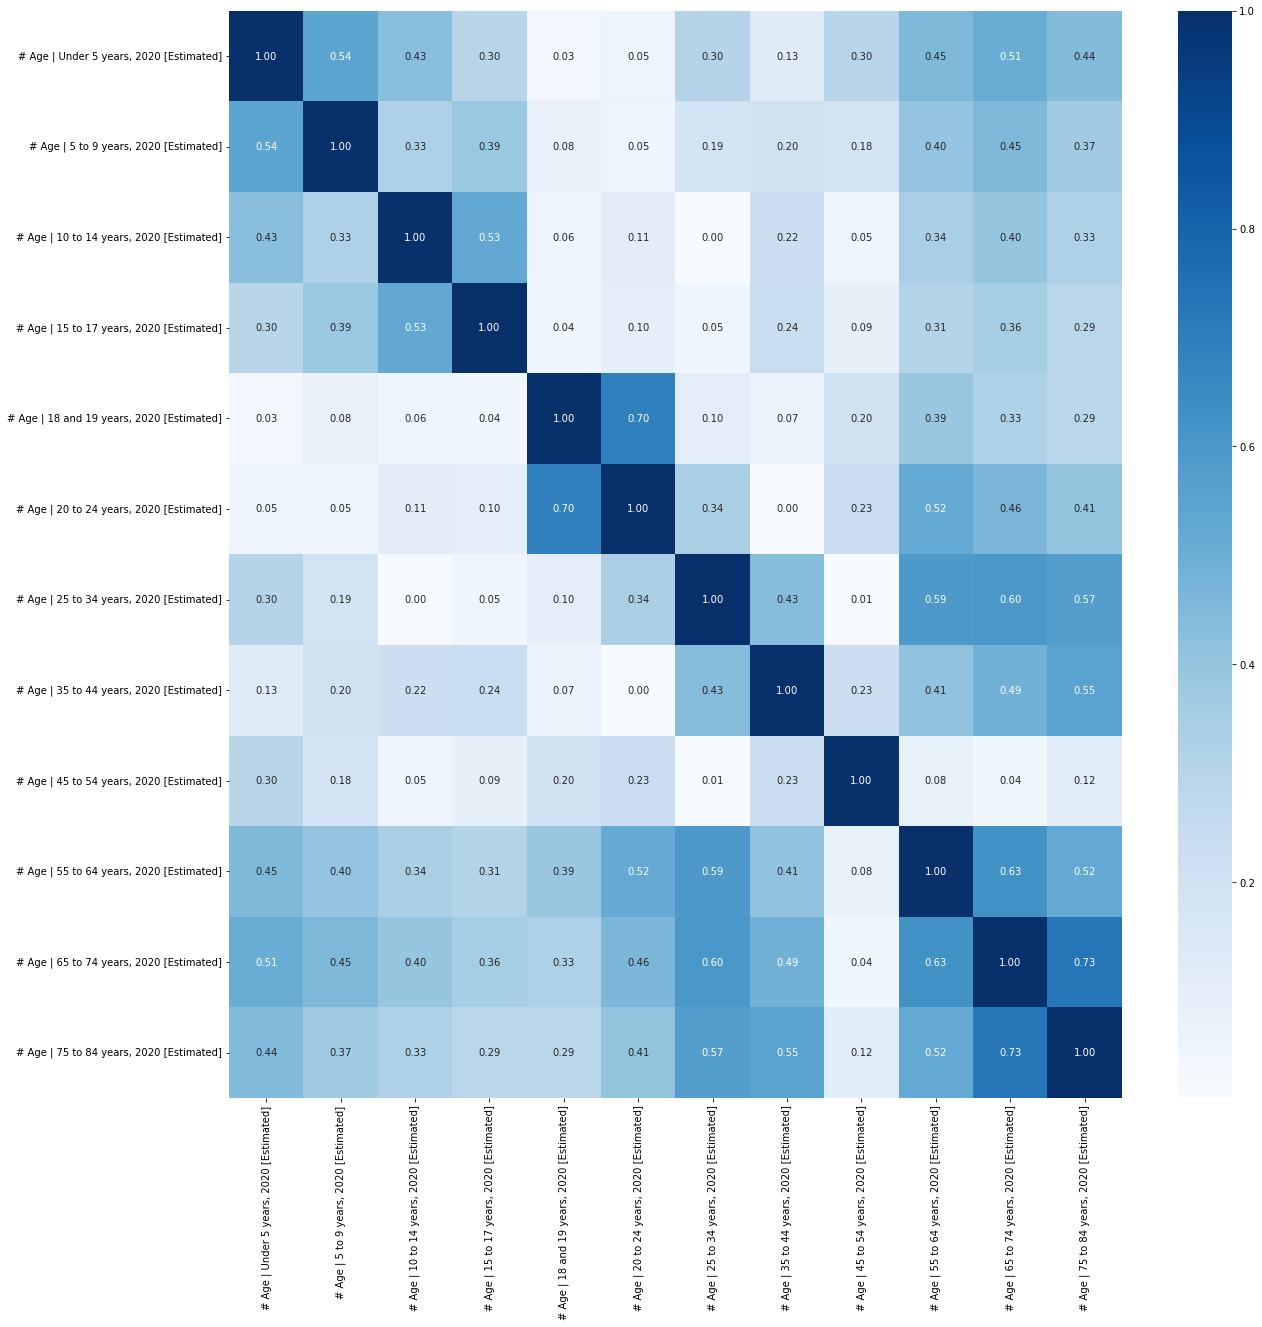

In [9]:
demo_selected = demo_clean.loc[:,demo_clean.columns.str.contains('# Age')]
demo_selected
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(demo_selected.corr()),annot=True, fmt=".2f",cmap='Blues')

In [10]:
demo_selected_income = demo_clean.loc[:,demo_clean.columns.str.contains('Income')]
demo_selected_income

,"# Household Income | Households, 2020 [Estimated]","# Household Income | Less than $10,000, 2020 [Estimated]","# Household Income | $10,000 to $19,999, 2020 [Estimated]","# Household Income | $20,000 to $29,999, 2020 [Estimated]","# Household Income | $30,000 to $39,999, 2020 [Estimated]","# Household Income | $40,000 to $49,999, 2020 [Estimated]","# Household Income | $50,000 to $59,999, 2020 [Estimated]","# Household Income | $60,000 to $74,999, 2020 [Estimated]","# Household Income | $75,000 to $99,999, 2020 [Estimated]","# Household Income | $100,000 to $124,999, 2020 [Estimated]","# Household Income | $125,000 to $149,999, 2020 [Estimated]","# Household Income | $150,000 to $199,999, 2020 [Estimated]","# Household Income | $200,000 or more, 2020 [Estimated]"
0,9545.0,0.100471,0.146674,0.158722,0.100052,0.099005,0.087166,0.086537,0.069775,0.055631,0.035411,0.033002,130.0
1,22229.0,0.099510,0.145216,0.126996,0.096810,0.073912,0.048855,0.075892,0.118494,0.068784,0.044266,0.056503,727.0
2,13172.0,0.055876,0.096796,0.143031,0.125418,0.087990,0.088749,0.098239,0.126404,0.068403,0.028166,0.039022,360.0
3,176383.0,0.062217,0.064156,0.076362,0.085110,0.078624,0.076101,0.104744,0.138738,0.105571,0.064428,0.065851,12633.0
4,3151.0,0.058077,0.059346,0.131704,0.100920,0.097747,0.083466,0.090447,0.154871,0.095843,0.045700,0.040622,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,73572.0,0.078970,0.113345,0.121079,0.118184,0.098611,0.083170,0.096858,0.120820,0.070638,0.034048,0.034293,1346.0
3218,4109.0,0.060355,0.075444,0.081772,0.104892,0.142127,0.072280,0.108542,0.141640,0.087126,0.058652,0.030908,93.0
3219,4436.0,0.130298,0.154193,0.152615,0.099188,0.105500,0.040352,0.091298,0.087015,0.041253,0.019387,0.032236,151.0
3220,3435.0,0.080640,0.178748,0.157205,0.161572,0.108006,0.032023,0.121980,0.092285,0.029403,0.016885,0.004949,9.0


In [11]:
def plot_heatmap(input):
    plt.figure(figsize=(20,20))
    sns.heatmap(np.abs(input.corr()),annot=True, fmt=".2f",cmap='Blues')

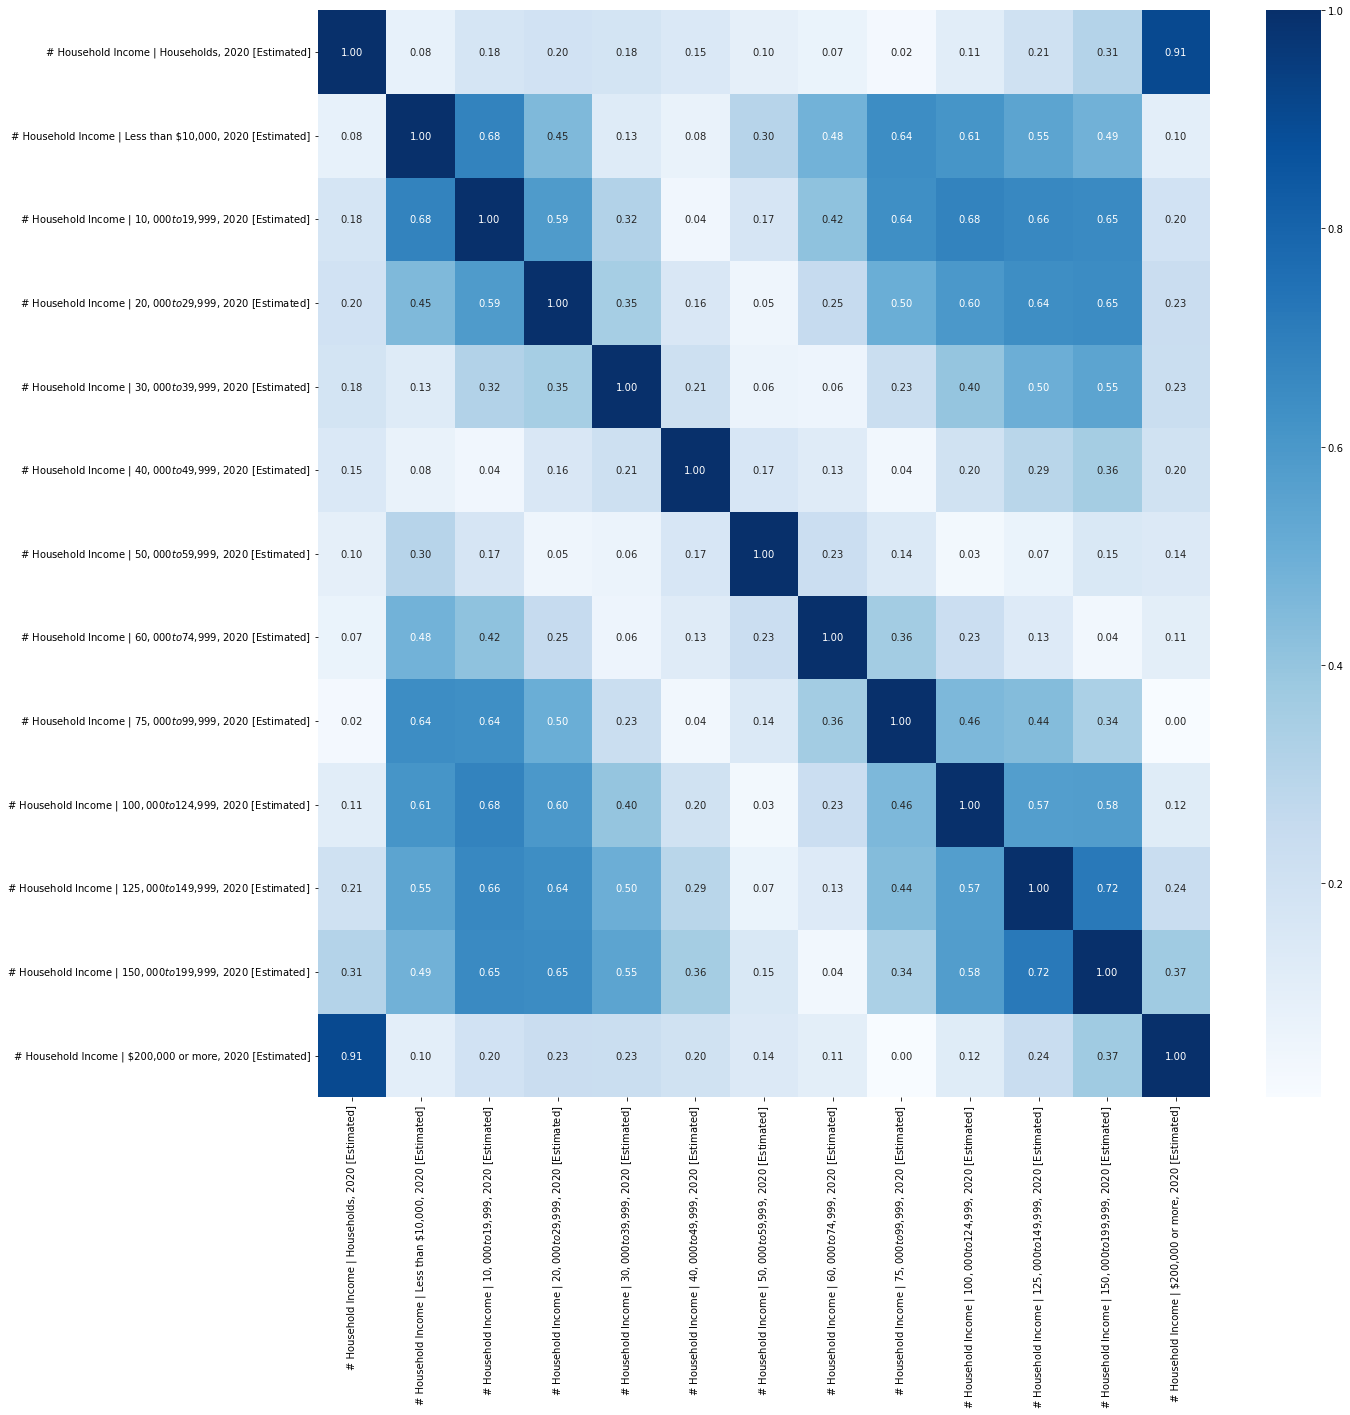

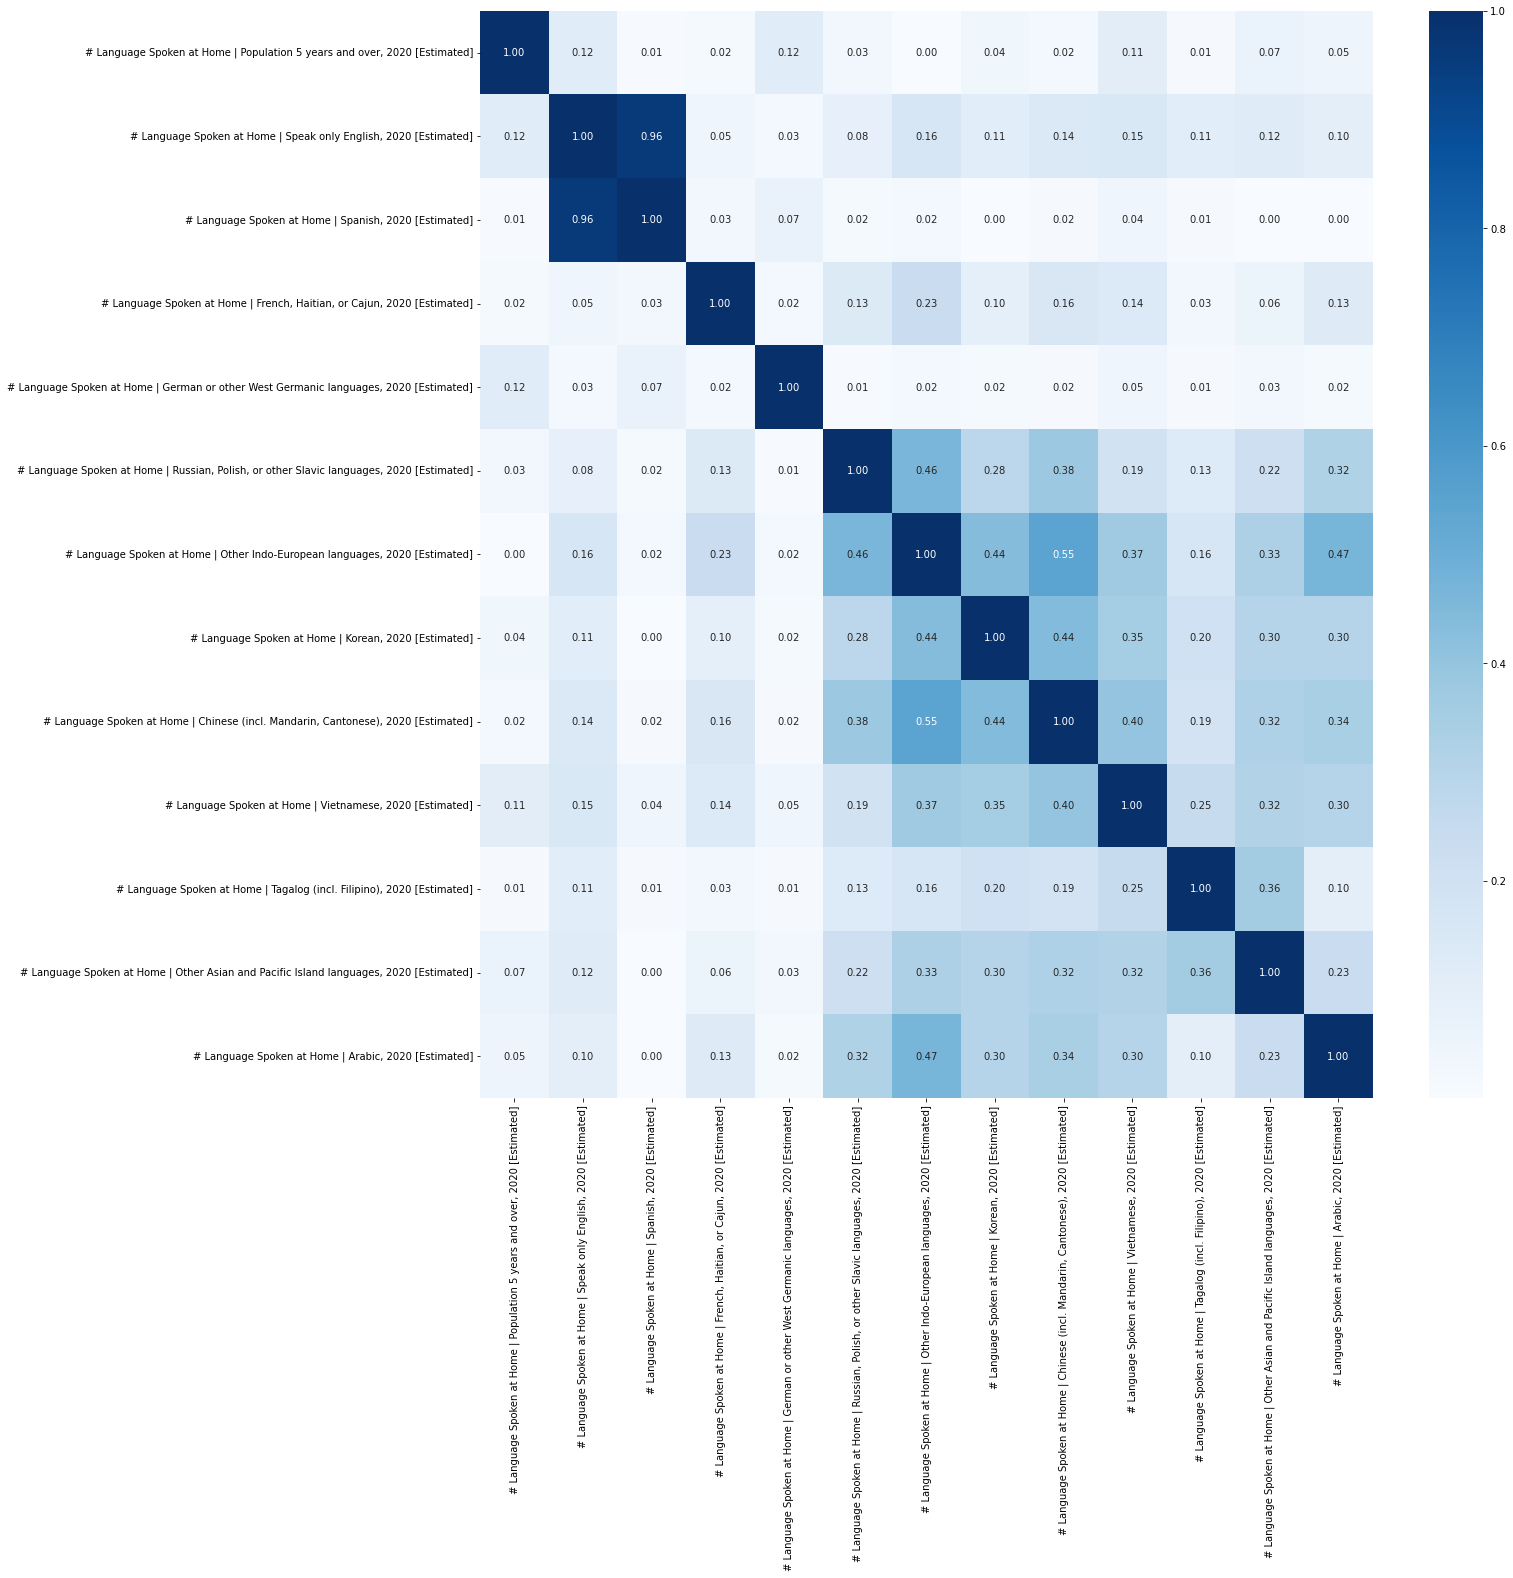

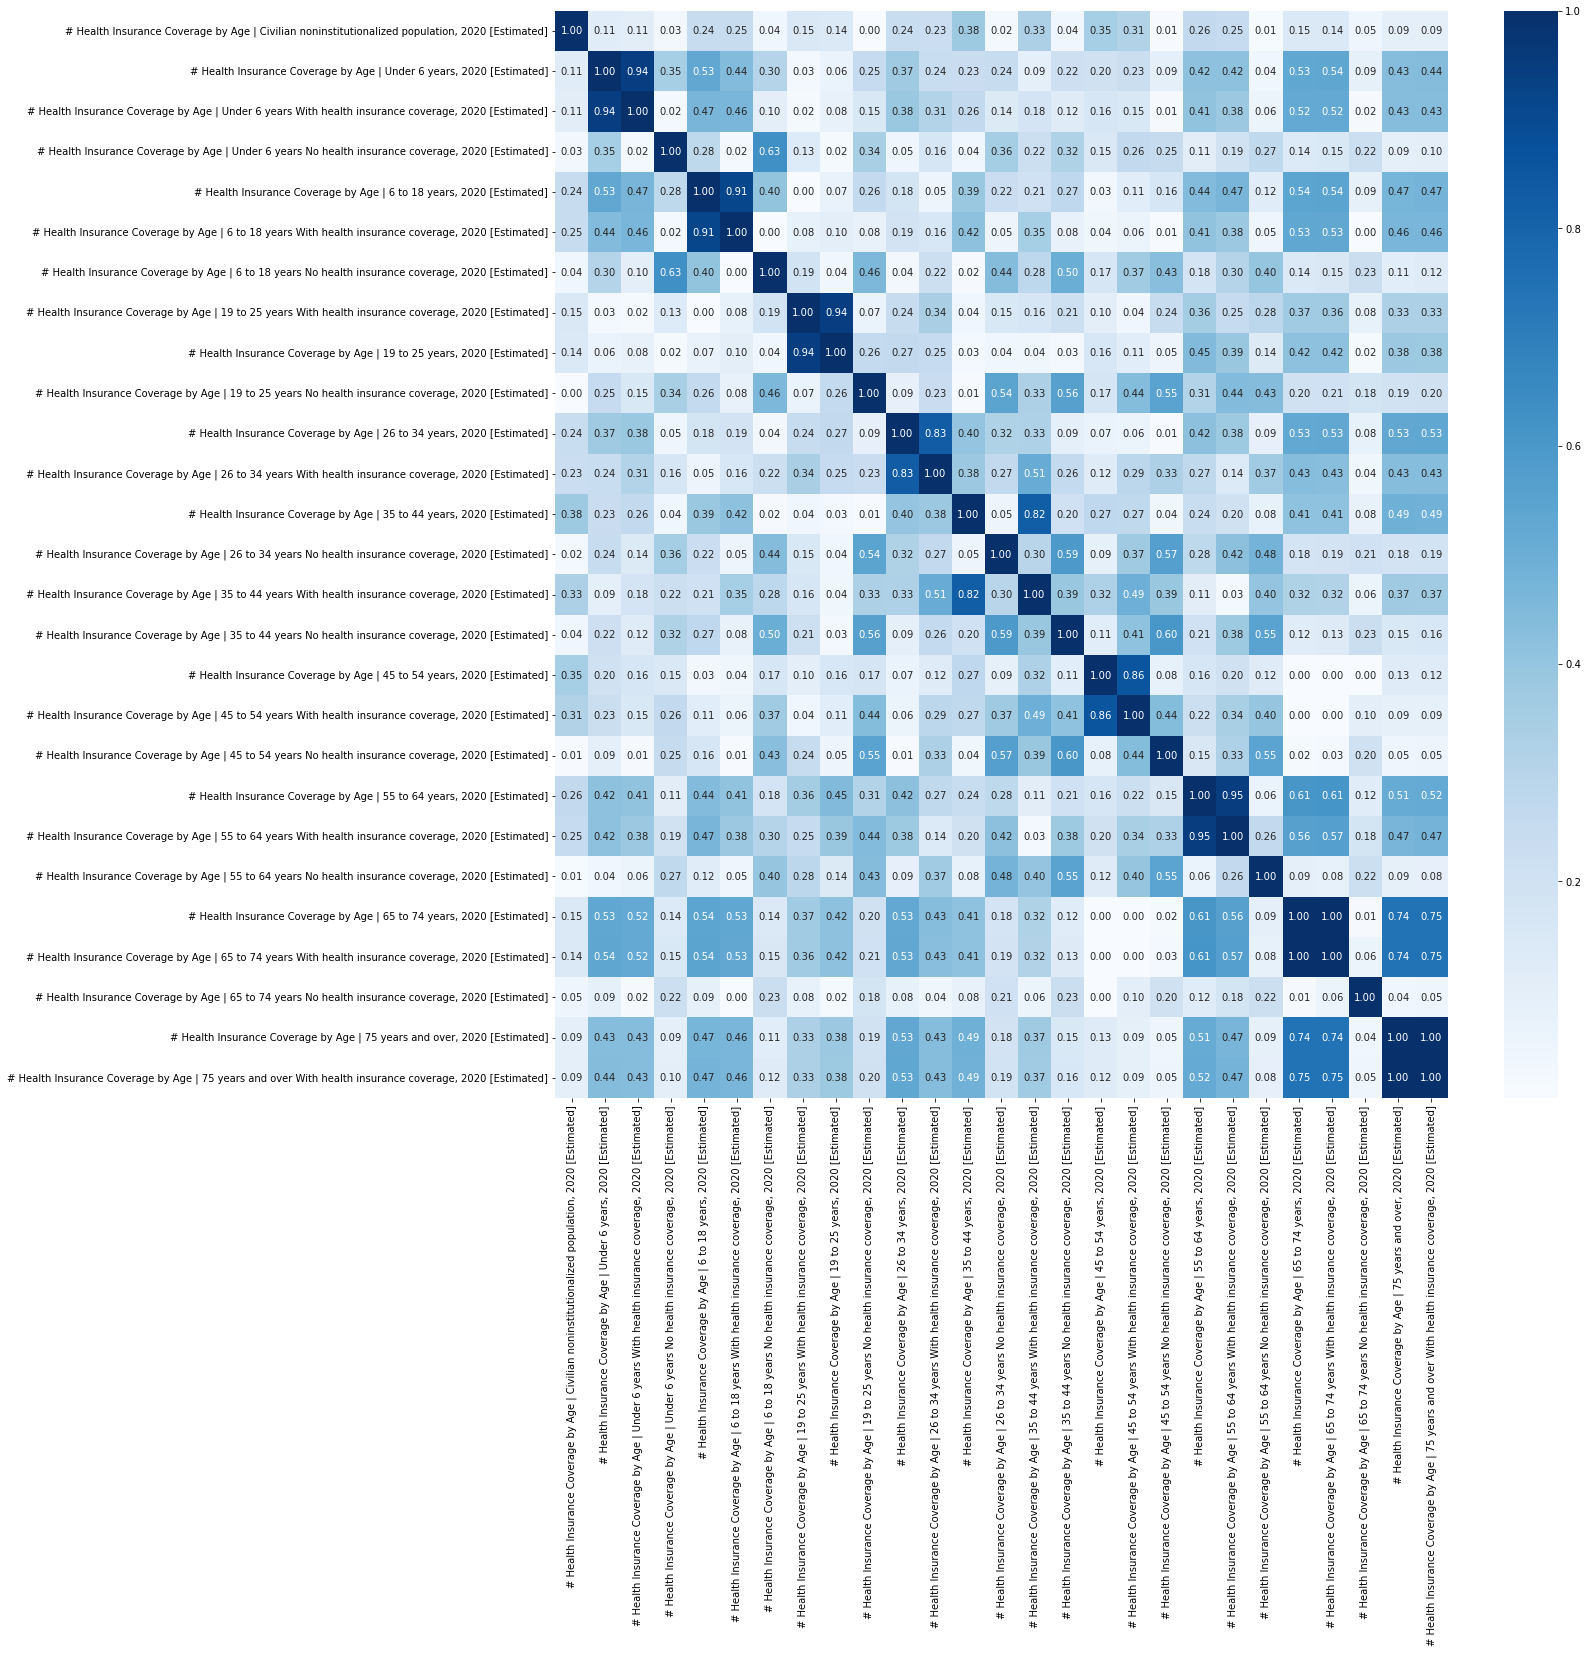

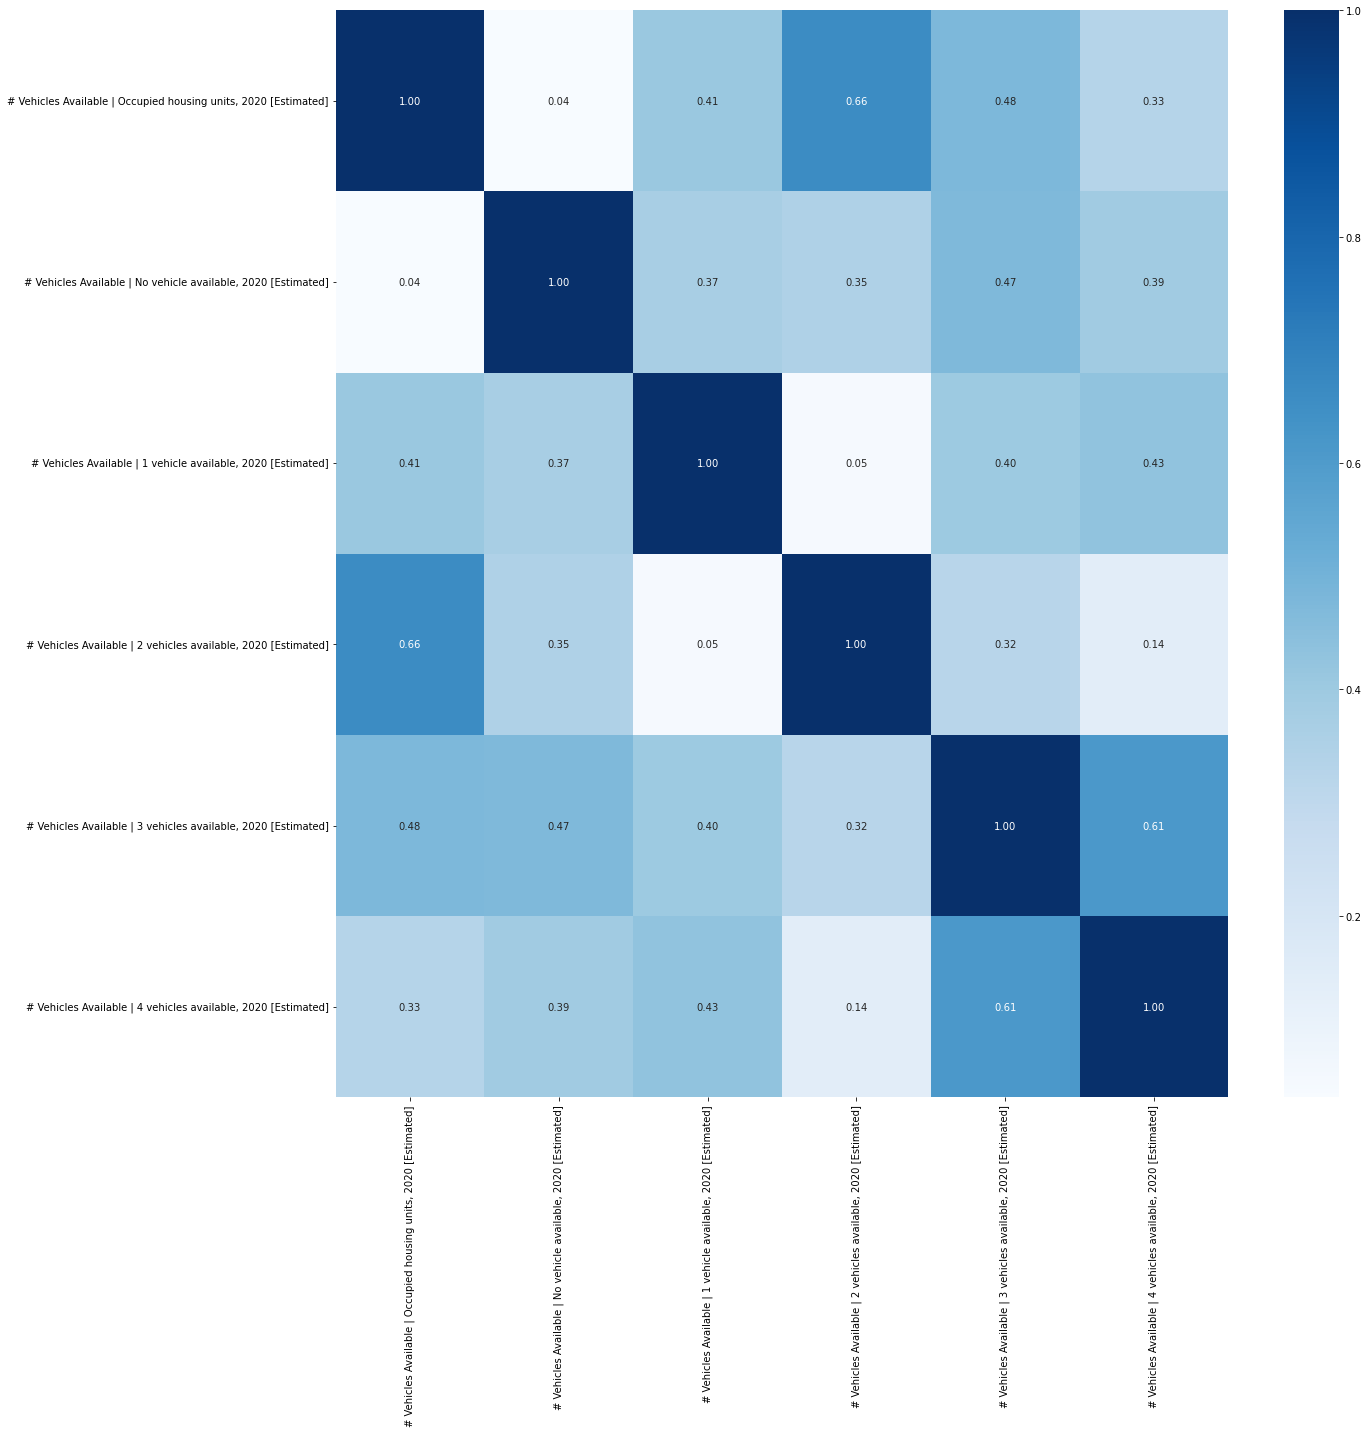

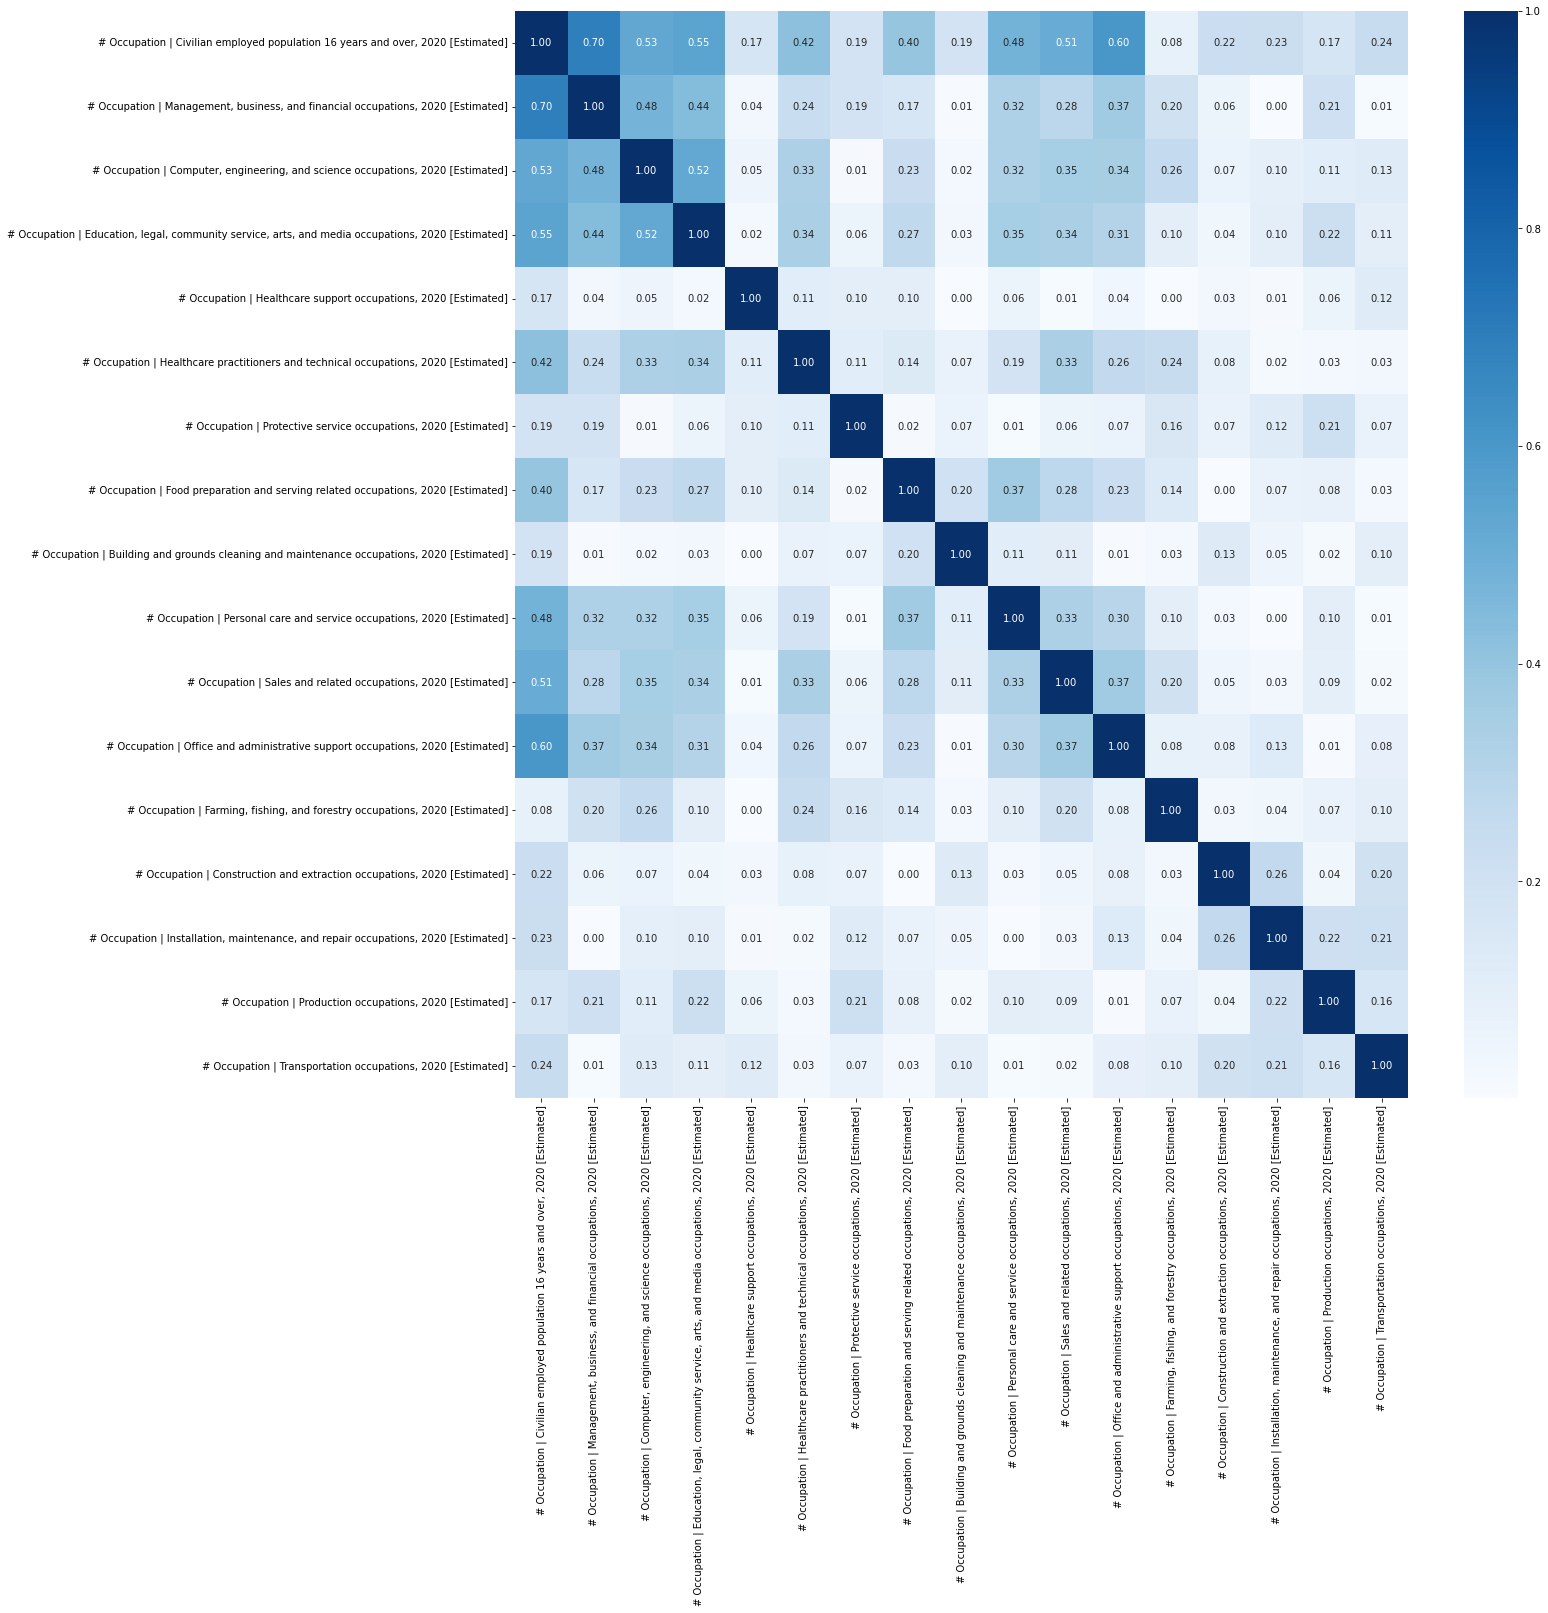

In [12]:
plot_heatmap(demo_selected_income)
demo_selected_lan = demo_clean.iloc[:,69:82]
plot_heatmap(demo_selected_lan)
demo_selected_ins = demo_clean.iloc[:,83:110]
plot_heatmap(demo_selected_ins)
demo_selected_ins
demo_selected_veh = demo_clean.iloc[:,115:121]
plot_heatmap(demo_selected_veh)
demo_selected_occ = demo_clean.iloc[:,161:178]
plot_heatmap(demo_selected_occ)